# Magic Gamma Telescope

In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_classification import GPC

from sklearn.cluster import KMeans

from vi_svi_class_experiments import run_methods
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Данные

In [3]:
# x_tr, y_tr = load_svmlight_file('../../../../Programming/DataSets/Classification/magic_gamma_telescope(19020,11).txt')
data = np.load('../../../../Programming/DataSets/Classification/magic_gamma_telescope(19020,11).npy')
x_tr, y_tr = data[:, :-1], data[:, -1]
x_tr, y_tr = shuffle(x_tr, y_tr, random_state=241)
data_name = 'magic telescope'

# x_tr = x_tr.T
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr).T
x_tr = (x_tr + 1) / 2
y_tr = y_tr[:, None]
y_tr[y_tr == 0] = -1
x_test = x_tr[:, int(x_tr.shape[1] * 0.8):]
y_test = y_tr[int(x_tr.shape[1] * 0.8):, :]
y_tr = y_tr[:int(x_tr.shape[1] * 0.8), :]
x_tr = x_tr[:, : int(x_tr.shape[1] * 0.8)]
dim, num = x_tr.shape

print('of objects:', num)
print('of features:', dim)
print(data_name)

of objects: 15215
of features: 10
magic telescope


## K-Means cluster centers

In [4]:
ind_num = 50
print('Finding means...')
means = KMeans(n_clusters=ind_num, n_init=3, max_iter=100, random_state=241)
means.fit(x_tr.T)
inputs = means.cluster_centers_.T
print('...found')

Finding means...
...found


In [5]:
cov_params = np.array([1., 1., 1.])

## svi-L-BFGS-B-c method

In [6]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
svi_gp = GPC(model_covariance_obj, method='svi')

In [7]:
opts = {'mode': 'full', 'maxiter': 30, 'mydisp': True}
svi_res = svi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Hyper-parameters at iteration 0 : [ 1.  1.  1.  0.  0.]
Hyper-parameters at iteration 1 : [ 0.99892016  1.7618086   0.99892016  0.16217421  0.1385381 ]
Hyper-parameters at iteration 2 : [ 1.0986876   2.44237045  0.64321784  0.34083851  0.29427466]
Hyper-parameters at iteration 3 : [ 1.3140426   3.3455302   0.42478591  0.59877486  0.51480589]
Hyper-parameters at iteration 4 : [ 1.62698244  4.55797512  0.28463631  0.9496354   0.81380692]
Hyper-parameters at iteration 5 : [ 2.32427819  7.41513344  0.2524348   1.76134886  1.51038573]
Hyper-parameters at iteration 6 : [ 2.56671959  8.31409168  0.36402298  2.00132659  1.75152657]
Hyper-parameters at iteration 7 : [ 2.67706849  8.65990159  0.33420729  2.10159057  1.84499418]
Hyper-parameters at iteration 8 : [ 2.75379071  8.81998347  0.31009852  2.14655723  1.89854228]
Hyper-parameters at iteration 9 : [ 2.85004476  8.90740627  0.29070601  2.16729771  1.9506942 ]
Hyper-parameters at iteration 10 : [ 3.14915611  8.92662193  0.25475679  2.15269

In [8]:
metric = lambda w: svi_gp.get_prediction_quality(w, x_test, y_test)
svi_x_lst, svi_y_lst = svi_res.plot_performance(metric, 't', freq=1)

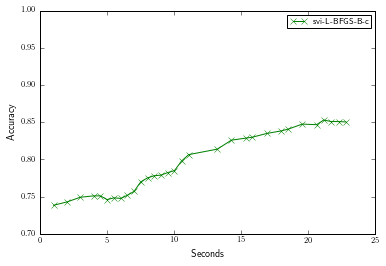

In [11]:
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## vi-means-c method

In [31]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
vi_gp = GPC(model_covariance_obj, method='vi')

In [32]:
opts = {'maxiter':2, 'mydisp': True}
vi_res = vi_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts, max_out_iter=10)

Hyper-parameters at iteration 0 : [ 1.  1.  1.]
Hyper-parameters at iteration 1 : [ 0.99911072  1.89736345  0.99911072]
Hyper-parameters at iteration 2 : [ 1.05247457  1.74741053  0.01      ]
Hyper-parameters at iteration 3 : [ 1.15105548  1.83490237  0.01      ]
	Hyper-parameters at outter iteration 0 : [ 1.41600205  2.04726039  0.01      ]
Hyper-parameters at iteration 0 : [ 1.41600205  2.04726039  0.01      ]
Hyper-parameters at iteration 1 : [ 1.66829375  2.0463898   0.01      ]
Hyper-parameters at iteration 2 : [ 2.05139811  2.04506806  0.01      ]
Hyper-parameters at iteration 3 : [ 2.32272042  2.04413267  0.01      ]
	Hyper-parameters at outter iteration 1 : [ 2.48868581  2.04356222  0.01      ]
Hyper-parameters at iteration 0 : [ 2.48868581  2.04356222  0.01      ]
Hyper-parameters at iteration 1 : [ 2.48622656  2.33373267  0.01      ]
Hyper-parameters at iteration 2 : [ 2.48628656  2.32669836  0.01      ]
Hyper-parameters at iteration 3 : [ 2.48630856  2.32413978  0.01      ]


In [33]:
metric = lambda w: vi_gp.get_prediction_quality(w, x_test, y_test)
vi_x_lst, vi_y_lst = vi_res.plot_performance(metric, 't', freq=1)

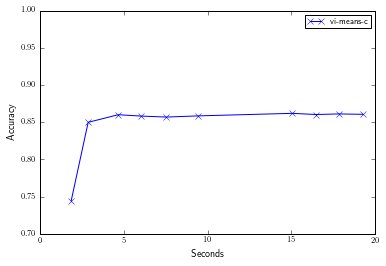

In [34]:
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
# plt.plot(svi_x_lst[1:100], svi_y_lst[1:100], '-gx', label='svi-L-BFGS-B-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## svi-AdaDelta-c
Подберем шаг для метода

In [17]:
results = []
steps = [1., 0.5, 0.3, 0.1, 0.01]
for step in steps:
    print(step)
    model_covariance_obj = SquaredExponential(np.copy(cov_params))
    ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)

    opts = {'mode': 'adadelta', 'maxiter': 10, 'verbose': False, 'batch_size': 50, 
            'step_rate': step}#, 'print_freq':50}
    batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)
    results.append(batch_res)

1.0
0.5
0.3
0.1
0.01


/Users/IzmailovPavel/Documents/Education/Course Project/Code/GP/gaussian_process_classification.py:605: RuntimeWarning: invalid value encountered in log
  loss += np.sum(np.log(np.diag(sigma_L))) * l / N


0
1
2
3
4


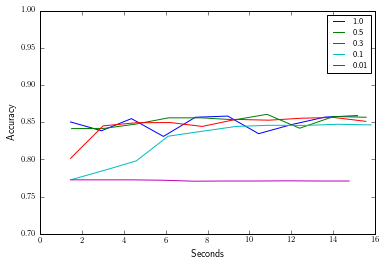

In [18]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
for i in range(len(results)):
    svi_ad_x_lst, svi_ad_y_lst = results[i].plot_performance(metric, 't', freq=1)
    plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], label=steps[i])
    print(i)
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [24]:
model_covariance_obj = SquaredExponential(np.copy(cov_params))
ad_gp = GPC(model_covariance_obj, method='svi', hermgauss_deg=100)
opts = {'mode': 'adadelta', 'maxiter': 20, 'verbose': True, 'batch_size': 50, 
        'step_rate': .3, 'print_freq':1}
batch_res = ad_gp.fit(x_tr, y_tr, inputs=inputs, optimizer_options=opts)

Iteration  304 :
	Gradient norm 3.41284204066
Iteration  608 :
	Gradient norm 9.03125929262
Iteration  912 :
	Gradient norm 5.94019805945
Iteration  1216 :
	Gradient norm 52.0810892827
Iteration  1520 :
	Gradient norm 8.31310933398
Iteration  1824 :
	Gradient norm 20.7098218842
Iteration  2128 :
	Gradient norm 13.2085872655
Iteration  2432 :
	Gradient norm 15.7135752891
Iteration  2736 :
	Gradient norm 12.8245148112
Iteration  3040 :
	Gradient norm 14.5316590963
Iteration  3344 :
	Gradient norm 9.97716786707
Iteration  3648 :
	Gradient norm 8.94135999049
Iteration  3952 :
	Gradient norm 10.1420663256
Iteration  4256 :
	Gradient norm 12.0014238375
Iteration  4560 :
	Gradient norm 10.7736752605
Iteration  4864 :
	Gradient norm 9.80725208638
Iteration  5168 :
	Gradient norm 14.2764178965
Iteration  5472 :
	Gradient norm 7.41626878492
Iteration  5776 :
	Gradient norm 11.0474909283
Iteration  6080 :
	Gradient norm 9.46029609933


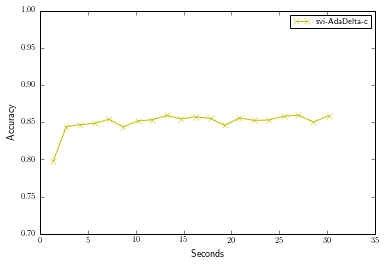

In [25]:
metric = lambda w: ad_gp.get_prediction_quality(w, x_test, y_test)
svi_ad_x_lst, svi_ad_y_lst = batch_res.plot_performance(metric, 't', freq=1)
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

## Выводы

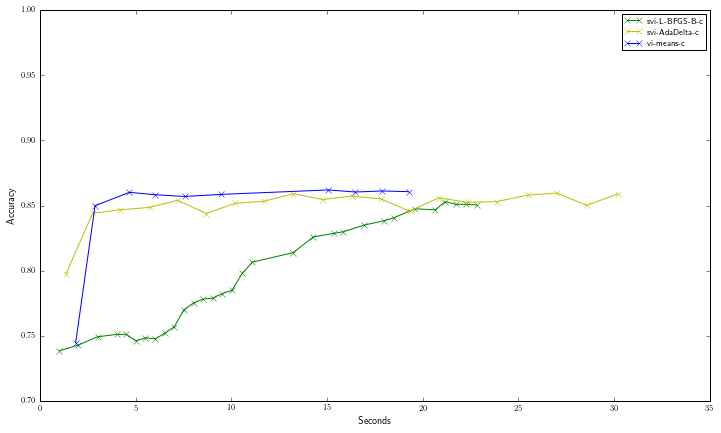

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(svi_x_lst[1:], svi_y_lst[1:], '-gx', label='svi-L-BFGS-B-c')
plt.plot(svi_ad_x_lst[1:], svi_ad_y_lst[1:], '-yx', label='svi-AdaDelta-c')
plt.plot(vi_x_lst[1:], vi_y_lst[1:], '-bx', label='vi-means-c')
plt.ylim([0.7, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

In [53]:
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_x.npy', svi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_svi_y.npy', svi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_x.npy', vi_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_vi_y.npy', vi_y_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_x.npy', svi_ad_x_lst)
np.save('../plots/vi_vs_svi_class/'+ data_name +'_ad_y.npy', svi_ad_y_lst)